
### Guidelines
I strongly advise you to carefully read this assignment, think about approaches and try to understand the data before diving into the questions. 

* **You can complete this assignment working on this Google Colab if you wish

In [0]:
from google.colab import files

uploaded = files.upload()

# Details


### You have the following information in your files
- "agents.csv" and
- "properties.csv"


- PROPERTIES table: 
  - **id**(PK, INT) - unique identification number of the property ad listing
  - **title**(VARCHAR) - title of the property ad listing
  - **features**(VARCHAR) - field with additional characteristics of the property ad listing
  - **living_area**(FLOAT) - living area of the property in square meters
  - **total_area**(FLOAT)- total area of the property in square meters
   - **plot_area**(FLOAT) - plot area of the property in square meters
  - **price**(FLOAT) - selling price of the property in euros
  - **agent_id**(INT) - selling agent id
  - **createdAt**(DATE) - date in which the property was added to the market
- AGENTS table: 
  - **agent_id**(PK, INT) - selling agent id
  - **company**(VARCHAR) - company for which the agent works

#### Details of properties:
- **locations** can be: Alenquer, Quinta da Marinha, Golden Mile, Nagüeles;
- **types** can be: ‘apartment’, ‘penthouse’, ‘duplex’, ‘house’, ‘villa’, ‘country estate’,
‘moradia', ‘quinta', ‘plot’, ‘land’; 
- the property types can be part of the following **property groups**:
  1. group **‘apartments’** includes types ‘apartment’, ‘penthouse’, ‘duplex’;
  2. group **‘‘houses’**‘ includes types ‘house’, ‘villa’, ‘country estate’, ‘moradia', ‘quinta’;
  3. group **‘‘plots’**‘ includes types ’plot’, ‘land’.
- areas:
 - for the group **‘plots’** use **plot_area**;
 - for groups **‘apartments’** and **‘houses’** use the highest value between **total_area** or **living_area**;



**challenge**
- (Q6) Write a code to identify companies (agents) with most expensive properties for each month in 2017
- (Q7) Write a code to get first and last property posted by each company (agents)

# Data Analysis (Python)

 For this part, feel free to use as many cells as you need below this point. Please use properties.csv as your data source. 



## Problem 
A private investor is planning an investment in one of the four locations. In order to decide where to invest he needs to know the price impact of such features as ‘pool’, ‘sea view’ and ‘garage’ on properties in each location.
He also asks for the mean price of the properties in each type group (‘apartments’, ‘houses’, ‘plots’) and wants to know about properties in the market that are undervalued and overvalued. In order to accomplish the problem that was described we want you to cover the following steps:

#### Part 1: Data Cleaning
As you have seen previously, a lot of information is present in the title/features fields. From there, we want to extract the relevant information for further analysis, such as:
 - 1A: Property  **type** (as presented in **Details** above, of each property from **title** field
 - 1B: Property **location** (as presented in **Details** above, of each property from **title** field
 - 1C: From **features** field, if a property has:
  - a pool
  - a garage
  - sea view

#### Expected Outcome for Part 1:
- Create a property dataset with the following schema and save it in a csv file:
  - id; 
  - location name
  - type
  - title
  - features
  - pool (0/1)
  - sea view (0/1)
  - garage (0/1)
- Pool, sea view and garage should be binary:1 if the property has the feature and 0 if not
- For each of the 3 tasks (1A, 1B, 1C), describe in detail the what you did.
-  Please provide your code in the cells below, in a reproducible and understandable way;

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [306]:
property_types = set(['apartment', 'penthouse', 'duplex', 'house', 'villa', 'estate', 'moradia', 'quinta', 'plot', 'land'])
property_locations = set(['alenquer', 'quinta da marinha', 'golden mile', 'nagueles'])
property_groups = {'apartment':'apartments', 'penthouse':'apartments', 'duplex':'apartments', 'house':'houses', 'villa':'houses', 'estate':'houses', 'moradia':'houses', 'quinta':'houses', 'plot':'plots', 'land':'plots'}


In [215]:
props = pd.read_csv('properties.csv')
props.head()

,id,title,features,living_area,total_area,plot_area,price,agent_id,created_at
0,44525,Stunning 6 bedroom villa in the heart of the G...,NaN,NaN,918.0,NaN,4400000,184,2018-03-09
1,44859,"Villa for sale in Rocio de Nagüeles, Marbella ...",NaN,NaN,NaN,NaN,2400000,182,2017-02-19
2,45465,One level 5 bedroom villa for sale in Nagüeles,NaN,NaN,393.0,NaN,1900000,154,2017-04-17
3,50685,Large estate for sale in Rocio de Nagueles,NaN,0.0,640.0,0.0,4250000,113,2017-09-01
4,130728,Palatial Villa on Marbellas Golden Mile with ...,"Fireplace, Elevator, Terrace, Mountain view, F...",0.0,4903.0,11000.0,32000000,157,2017-02-07


In [146]:
def B_1(title):
    sentence = title.lower()
    sentence = sentence.replace("ü", "u")
    for location in property_locations:
        if location in sentence:
            return location
    return 'NA'

In [104]:
def A_1(title):
    sentence = title.lower()
    for typ in property_types:
        if typ in sentence:
            return typ
    return 'NA'

In [117]:
def C_1(title):
    if type(title) is not str:
        return (0, 0, 0)
    sentence = title.lower()
    feats = ['pool', 'sea view', 'garage']
    res = []
    for feat in feats:
        res.append(1 if feat in sentence else 0)
    return tuple(res)

In [264]:
property_df = pd.DataFrame()
property_df['id'] = props['id']
property_df['location name'] = props['title'].map(B_1)
property_df['type'] = props['title'].map(A_1)
property_df['title'] = props['title']
property_df['features'] = props['features'].map(lambda feat: feat if type(feat) is str else '')
resp = props['features'].map(C_1)
property_df['pool'] = resp.map(lambda tup: tup[0])
property_df['sea view'] = resp.map(lambda tup: tup[1])
property_df['garage'] = resp.map(lambda tup: tup[2])
property_df.head()

,id,location name,type,title,features,pool,sea view,garage
0,44525,golden mile,villa,Stunning 6 bedroom villa in the heart of the G...,,0,0,0
1,44859,golden mile,villa,"Villa for sale in Rocio de Nagüeles, Marbella ...",,0,0,0
2,45465,nagueles,villa,One level 5 bedroom villa for sale in Nagüeles,,0,0,0
3,50685,nagueles,estate,Large estate for sale in Rocio de Nagueles,,0,0,0
4,130728,golden mile,villa,Palatial Villa on Marbellas Golden Mile with ...,"Fireplace, Elevator, Terrace, Mountain view, F...",0,0,0


In [265]:
property_df.to_csv('property.csv')

#### Part 2: Identify outliers
Now that the data is structured correctly, let's look at which properties are a  good deal for our investor. For this you will need to **identify undervalued, overvalued, and normal properties** in the dataset. Remember that a  undervalued house in one location can be considered a high outlier in another location. Location and type classifications are important in this task.
#### Expected Outcome for Part 2:
- As before, deliver a csv file with the following format:
  - id
  - location name
  - type
  - area
  - price
  - over-valued (0/1)
  - under-valued (0/1)
  - normal (0/1)
- the new columns should be binary, where for example **over-valued** column would get value 1 if the property is indeed over-valued, 0 otherwise;
- A short report (could be a pdf file or new cells within the notebook) containing:
  - visualizations (such as scatter plots) discriminating between the undervalued, overvalued and normal properties.
  - a explanation of what is the difference between under-valued/over-valued properties and pure data outliers;
  - any notes/conclusions you wish to add;
- Provide your code in a reproducible way in the cells below;

In [218]:
temp_df = property_df[['location name', 'type']]
occurrences = []
for location in property_locations:
    curr = {}
    curr['location'] = location
    for curr_type in property_types:
        curr[curr_type] = len(temp_df[(temp_df['location name'] == location) & (temp_df['type'] == curr_type)])
    occurrences.append(curr)
new_df = pd.DataFrame(occurrences)
new_df = new_df.set_index('location')
new_df

,apartment,duplex,estate,house,land,moradia,penthouse,plot,quinta,villa
location,,,,,,,,,,
golden mile,231,10,0,196,0,0,0,9,0,232
quinta da marinha,0,0,0,69,0,0,0,3,947,151
alenquer,92,9,0,87,79,304,0,0,36,148
nagueles,784,2,3,773,2,0,0,57,0,685


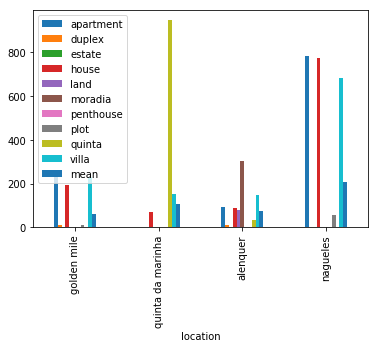

In [259]:
new_df.plot.bar()

Text(0, 0.5, 'golden mile')

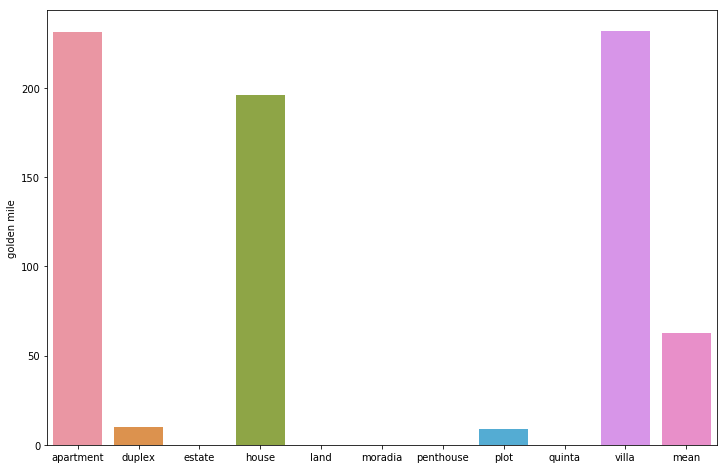

In [256]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_df.loc[['golden mile']])
plt.ylabel('golden mile')

Text(0, 0.5, 'quinta da marinha')

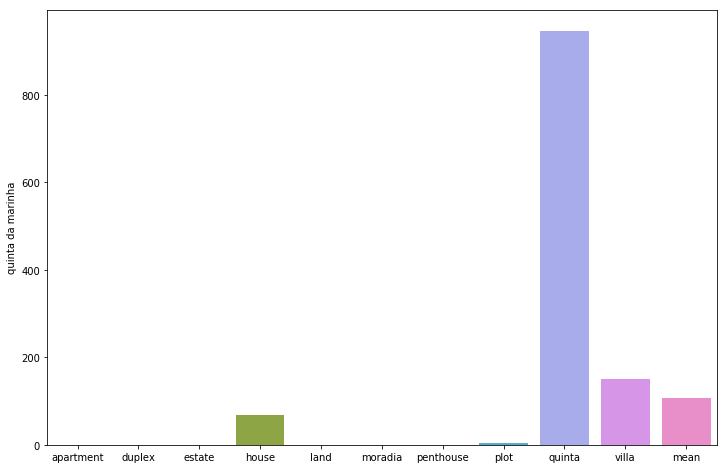

In [257]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_df.loc[['quinta da marinha']])
plt.ylabel('quinta da marinha')

Text(0, 0.5, 'alenquer')

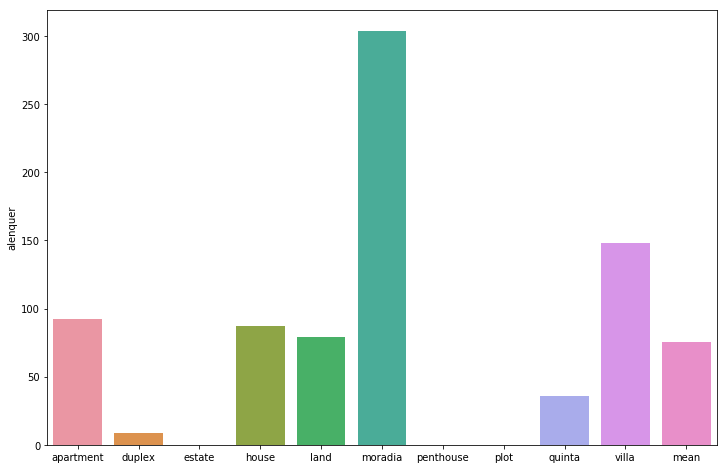

In [258]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_df.loc[['alenquer']])
plt.ylabel('alenquer')

Text(0, 0.5, 'nagueles')

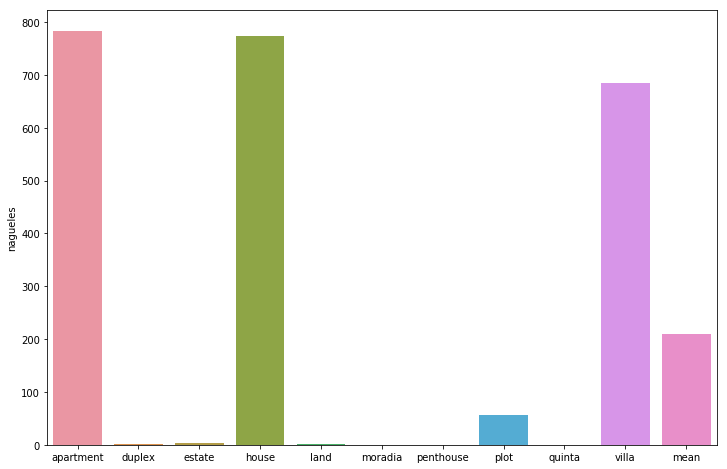

In [260]:
plt.figure(figsize=(12, 8))
sns.barplot(data=new_df.loc[['nagueles']])
plt.ylabel('nagueles')

In [254]:
new_df['mean'] = new_df.apply(lambda row: row.mean(),axis=1)
new_df

,apartment,duplex,estate,house,land,moradia,penthouse,plot,quinta,villa,mean
location,,,,,,,,,,,
golden mile,231,10,0,196,0,0,0,9,0,232,62.454545
quinta da marinha,0,0,0,69,0,0,0,3,947,151,106.363636
alenquer,92,9,0,87,79,304,0,0,36,148,75.818182
nagueles,784,2,3,773,2,0,0,57,0,685,209.909091


In [301]:
def discoverOutliers(row):
    if row['type'] == 'NA':
        return (0, 0, 0)
    curr_location = new_df.loc[row['location name']]
    count = curr_location[row['type']]
    mean = curr_location['mean']
    treshhold = mean * .25
    if count >= mean - treshhold and count <= mean + treshhold:
        return (0, 1, 0)
    return (1, 0, 0) if count < mean else (0, 0, 1)

In [320]:
def getArea(row):
    tip = row['type']
    if tip == 'NA':
        return -1
    area1 = set('plots')
    area2 = set(['apartments','houses'])
    group = property_groups[tip]
    curr_prop = props[props['id'] == row['id']].iloc[0]
    if group in area1:
        return curr_prop['plot_area']
    elif group in area2:
        return max(curr_prop['total_area'], curr_prop['living_area'])
    else:
        -1

In [321]:
outliers_df = pd.DataFrame()
outliers_df['id'] = property_df['id']
outliers_df['location name'] = property_df['location name']
outliers_df['type'] = property_df['type']
outs = property_df[['location name', 'type']].apply(discoverOutliers, axis=1)
outliers_df['area'] = property_df.apply(getArea, axis=1)
outliers_df['price'] = props[props['id'] == property_df['id']]['price']
outliers_df['over-valued'] = outs.map(lambda x: x[2])
outliers_df['under-valued'] = outs.map(lambda x: x[0])
outliers_df['normal'] = outs.map(lambda x: x[1])
outliers_df.head()

,id,location name,type,area,price,over-valued,under-valued,normal
0,44525,golden mile,villa,918.0,4400000,1,0,0
1,44859,golden mile,villa,NaN,2400000,1,0,0
2,45465,nagueles,villa,393.0,1900000,1,0,0
3,50685,nagueles,estate,640.0,4250000,0,1,0
4,130728,golden mile,villa,4903.0,32000000,1,0,0


In [322]:
outliers_df.to_csv('outliers.csv')

#### Part 3: Theoretical questions

- Describe in detail how you would evaluate the price impact of features such as sea view, pool and garage considering the dataset provided. Your answer should also include how would you deal with missing values, outliers and duplicated listings (same property listing published by different agencies);


#### Part 4: Create a model to estimate the price of the properties based on the features you consider. You can use linear, polynomial, multivariate or tree regressors. 

#### Extra challenge 5:
- Describe how would you model the data over time (using createdAt field). What changes over time would you look for and what would you expect the outcomes to be? (i.e. in terms of pricing per location/type)